<a href="https://colab.research.google.com/github/minyoung347/python101/blob/main/1_3_pandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자료형: 데이터프레임

1. 넘파이 2차원 리스트/어레이를 입력변수로 하여 생성
2. 칼럼이름과 1차원 리스트/어레이으로 구성된 딕셔너리를 입력변수로 하여 생성

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([[1, 2], [3, 4]])

In [ ]:
df

,0,1
0,1,2
1,3,4


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df)==pd.DataFrame

True

In [ ]:
df.set_index(0)

,1
0,
1,2
3,4


In [ ]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]])

In [ ]:
df

,0,1
0,1,2
1,3,4
2,5,6


In [ ]:
df.columns = ['KOR', 'USA']

In [ ]:
df.index = [17, 18, 19]

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df = pd.DataFrame({'a':[1, 2], 'b':[3, 4]})

In [ ]:
df

,a,b
0,1,3
1,2,4


- 데이터프레임 통계량

In [ ]:
df.mean()

KOR    3.0
USA    4.0
dtype: float64

In [ ]:
df.mean().to_frame('mean')

,mean
KOR,3.0
USA,4.0


In [ ]:
df.apply(['mean', 'median', 'sum', 'std'])  # prod

,KOR,USA
mean,3.0,4.0
median,3.0,4.0
sum,9.0,12.0
std,2.0,2.0


## 슬라이스

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df.loc[18:, :]

,KOR,USA
18,3,4
19,5,6


In [ ]:
df.loc[17, :]

KOR    1
USA    2
Name: 17, dtype: int64

In [ ]:
df.loc[[17]]

,KOR,USA
17,1,2


In [ ]:
df = df.loc[18:, :].copy()

- 값 지정

In [ ]:
df

,KOR,USA
18,3,4
19,5,6


In [ ]:
df.loc[18, 'KOR'] = 0

In [ ]:
df

,KOR,USA
18,0,4
19,5,6


In [ ]:
df.loc[:, 'USA'] = 1

In [ ]:
df

,KOR,USA
18,0,1
19,5,1


In [ ]:
df.loc[:, :] = [[1, 2], [3, 4]]

In [ ]:
df

,KOR,USA
18,1,2
19,3,4


In [ ]:
df = [[1, 2], [3, 4]]

In [ ]:
df

[[1, 2], [3, 4]]

## 멀티인덱스

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
from pandas import MultiIndex as MI

In [ ]:
df.index = MI.from_product([['16', '17'], ['미국', '한국']])

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

In [ ]:
df.index = [':'.join(c).strip() for c in df.index.values]

In [ ]:
df

,pop,gdp
16:미국,1,3
16:한국,2,4
17:미국,3,5
17:한국,4,6


In [ ]:
df.index.str.split(':').tolist()

[['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]

라벨이 주어진 형태에 따라 멀티인덱스 생성 함수를 선택


```
- from_tuples() : [['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]
- from_product() : [['16', '17'], ['미국', '한국']]
- from_arrays() : [['16', '16', '17', '17'], ['미국', '미국', '한국', '한국']]
```

In [ ]:
df.index = MI.from_tuples(df.index.str.split(':').tolist())

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

IndexSlice: 다양한 층위에서 데이터 선택

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df = df.set_index('country', append=True)

In [ ]:
idx = pd.IndexSlice

In [ ]:
df.loc[idx[:, 'USA'], :]

,,pop,gdp
,country,,
16,USA,1,3
17,USA,3,5


In [ ]:
df.loc[idx[16, 'USA'], :]

pop    1
gdp    3
Name: (16, USA), dtype: int64

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.loc[df['pop'].ge(3)]

,country,pop,gdp
17,USA,3,5
17,KOR,4,6


In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.loc[df.country.isin(['USA', 'JPN'])]

,country,pop,gdp
16,USA,1,3
17,USA,3,5


- droplevels
- get_level_values
- reorder_levels

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df.index.names = ['yr', 'country']

In [ ]:
df

pop  gdp
yr country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
df.index.get_level_values(0).unique()

Int64Index([16, 17], dtype='int64', name='yr')

In [ ]:
df.index.get_level_values(1).unique()

Index(['USA', 'KOR'], dtype='object', name='country')

In [ ]:
df = df.loc[idx[:, 'USA'], :]

In [ ]:
df

,,pop,gdp
yr,country,,
16,USA,1,3
17,USA,3,5


In [ ]:
df.index = df.index.droplevel(level = 1)

In [ ]:
df

,pop,gdp
yr,,
16,1,3
17,3,5


## 연습문제

1.  연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 생성하시오
    - 인덱스 첫번째 레벨은 연도, 두번째 레벨은 국가명, 칼럼 라벨은 [gdp, inf]
    - 경제성장률과 물가상승률은 넘파이 랜덤표본 이용

3.  2018년 이후 국가별 경제성장률과 물가상승률을 보이시오

# 연산

In [ ]:
# 데이터프레임을 병렬로 표시하기 위한 함수 정의
from IPython.display import display_html
def display_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
df = pd.DataFrame({'KOR':[1, 3], 'USA':[2, 4]})

In [ ]:
df1 = df + 10

In [ ]:
df1.columns = ['USA', 'CHN']

In [ ]:
display_by_side(df1, df + df1)

USA 
 CHN 
 
 
 
 
 0 
 11 
 12 
 
 
 1 
 13 
 14 
 
 
 
 
 
 
 CHN 
 KOR 
 USA 
 
 
 
 
 0 
 NaN 
 NaN 
 13 
 
 
 1 
 NaN 
 NaN 
 17

In [ ]:
display(df, df.T)

,KOR,USA
0,1,2
1,3,4


,0,1
KOR,1,3
USA,2,4


In [ ]:
df.dot(df.T)

,0,1
0,5,11
1,11,25


In [ ]:
df.T.dot(df)

,KOR,USA
KOR,10,14
USA,14,20


In [ ]:
df.dot(df)

ValueError: ignored

In [ ]:
df1 = pd.DataFrame({'USA':[1, 3], 'CHN':[2, 4]})
df2 = pd.DataFrame({'JPN':[2, 4], 'KOR':[6, 8]})

In [ ]:
display(df1, df2)

,USA,CHN
0,1,2
1,3,4


,JPN,KOR
0,2,6
1,4,8


In [ ]:
pd.concat([df1, df2], axis = 1)

,USA,CHN,JPN,KOR
0,1,2,2,6
1,3,4,4,8


In [ ]:
pd.concat([df1, df2], axis = 0)

,USA,CHN,JPN,KOR
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
0,NaN,NaN,2.0,6.0
1,NaN,NaN,4.0,8.0


## merge, concat



In [133]:
print(df1)
print(df2)

   USA  CHN
0    1    2
1    3    4
   JPN  KOR
0    2    6
1    4    8


In [134]:
df2.columns = ['CHN', 'KOR']

In [136]:
print(df1)
print('')
print(df2)

   USA  CHN
0    1    2
1    3    4

   CHN  KOR
0    2    6
1    4    8


In [137]:
df1.merge(df2, on = 'CHN', how = 'left')

,USA,CHN,KOR
0,1,2,6
1,3,4,8


## add, sub, mul, div

In [139]:
df

,KOR,USA
0,1,2
1,3,4


In [141]:
print(df.sum(axis=0))
print('')
print(df.sum(axis=1))

KOR    4
USA    6
dtype: int64

0    3
1    7
dtype: int64


In [142]:
df['Total']

KeyError: 'Total'

In [143]:
df['Total'] = df.sum(axis = 1)
df

,KOR,USA,Total
0,1,2,3
1,3,4,7


In [144]:
df.div(df.Total, axis = 0)

,KOR,USA,Total
0,0.333333,0.666667,1.0
1,0.428571,0.571429,1.0


In [ ]:
df.div(df.Total, axis = 1)

,0,1,KOR,Total,USA
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN


## cut, qcut

- 숫자 데이터를 범주형 데이터로 변환

In [ ]:
from numpy.random import randint
df = pd.DataFrame({'a':range(4), 'b':randint(1,10,4)})
df

,a,b
0,0,9
1,1,7
2,2,5
3,3,3


In [ ]:
pd.cut(df.b, [0, 5, 10])

0    (5, 10]
1    (5, 10]
2     (0, 5]
3     (0, 5]
Name: b, dtype: category
Categories (2, interval[int64]): [(0, 5] < (5, 10]]

In [ ]:
df.loc[:, 'c'] = pd.cut(df.b, [0, 5, 10], labels=False)

In [ ]:
df

,a,b,c
0,0,9,1
1,1,7,1
2,2,5,0
3,3,3,0


In [ ]:
pd.qcut(df.b, 2)

0      (6.0, 9.0]
1      (6.0, 9.0]
2    (2.999, 6.0]
3    (2.999, 6.0]
Name: b, dtype: category
Categories (2, interval[float64]): [(2.999, 6.0] < (6.0, 9.0]]

## groupby

In [145]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [146]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [148]:
df.groupby('country').mean()

,pop,gdp
country,,
KOR,3.0,5.0
USA,2.0,4.0


In [ ]:
df = df[['pop', 'gdp']]

In [ ]:
df.groupby(pd.cut(df['pop'], [0, 2, 4]))['gdp'].mean()

pop
(0, 2]    3.5
(2, 4]    5.5
Name: gdp, dtype: float64

## lambda 함수

In [150]:
def cal_square(x):
  return x**2

In [151]:
square = lambda x: x * x

In [152]:
square(2)

4

In [153]:
cal_square(2)

4

## apply/applymap/map

In [154]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [155]:
df[['pop', 'gdp']].apply(lambda x: x+100)

,pop,gdp
16,101,103
16,102,104
17,103,105
17,104,106


In [156]:
df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [ ]:
df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [ ]:
df = df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))
df.applymap(lambda x: '{:,.2f}'.format(x))

,pop,gdp
16,0.10,0.17
16,0.20,0.22
17,0.30,0.28
17,0.40,0.33


## stack/unstack

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

df = df.set_index('country', append=True)

In [ ]:
df.unstack(level = 1)

pop     gdp    
country KOR USA KOR USA
16        2   1   4   3
17        4   3   6   5

## 연습문제

1.  앞에서 계산한 연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 이용하여
    - 2018년 이후 국가별 평균 경제성장률과 물가상승률을 계산하라
    - 2018년 이후 한국과 미국의 연도별 평균경제성장률을 계산하라

2.  같은 방식으로 중국(cn)의 경제성장률과 물가상승률 데이터프레임을 생성하여 결합하라

3.  4개 국가 평균 경제성장률이 0보다 큰 연도를 찾아라

# 시계열

In [162]:
a = np.random.randint(1, 20, 24)
print(a)
print(np.shape(a))

print(a.reshape(12, 2))
print(np.shape(a.reshape(12, 2)))

[12 15 15  5  6 13 17  7  9 13 12 17 10  5  9 10  7  8  4 16  5 18 17  2]
(24,)
[[12 15]
 [15  5]
 [ 6 13]
 [17  7]
 [ 9 13]
 [12 17]
 [10  5]
 [ 9 10]
 [ 7  8]
 [ 4 16]
 [ 5 18]
 [17  2]]
(12, 2)


In [164]:
pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'])

,con,gdp
0,19,19
1,6,13
2,12,17
3,2,19
4,1,8
5,6,9
6,5,18
7,13,1
8,9,3
9,1,6


In [165]:
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'])

In [166]:
df

,con,gdp
0,9,6
1,10,15
2,18,6
3,2,18
4,10,14
5,2,2
6,1,14
7,16,9
8,13,12
9,14,16


In [167]:
df.index = pd.date_range('2017-3-31', '2019-12-31', freq='Q')

In [168]:
df

,con,gdp
2017-03-31,9,6
2017-06-30,10,15
2017-09-30,18,6
2017-12-31,2,18
2018-03-31,10,14
2018-06-30,2,2
2018-09-30,1,14
2018-12-31,16,9
2019-03-31,13,12
2019-06-30,14,16


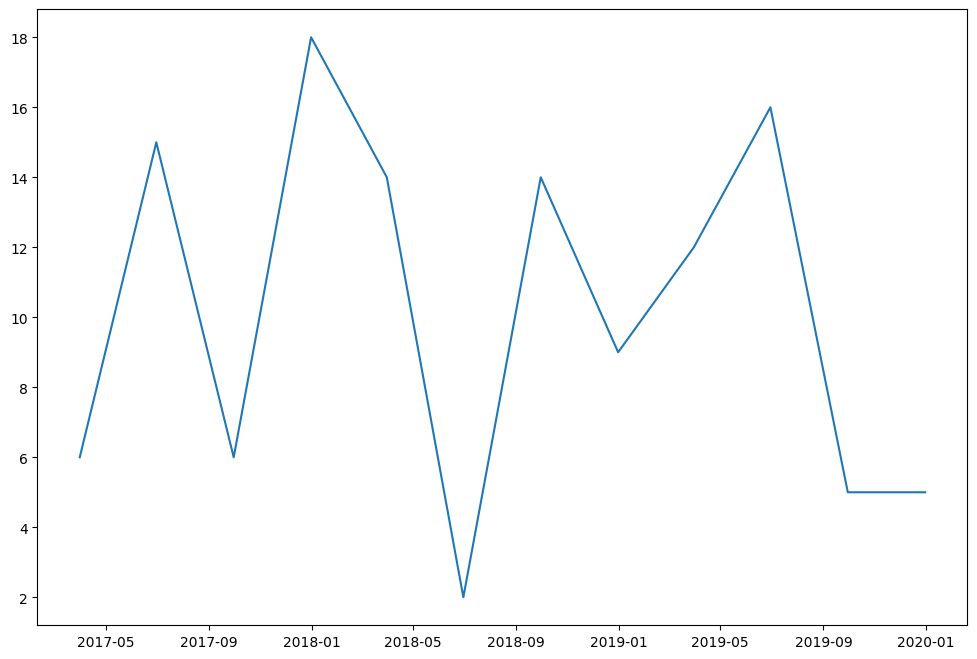

In [171]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=[12, 8])
ax.plot(df['gdp'])
plt.show()

In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## resample

In [172]:
df.resample('A').sum()

,con,gdp
2017-12-31,39,45
2018-12-31,29,39
2019-12-31,32,38


In [ ]:
df.resample('A').last()

,con,gdp
2017-12-31,3,13
2018-12-31,1,8
2019-12-31,3,11


In [ ]:
df.resample('A').mean()

,con,gdp
2017-12-31,6.75,12.25
2018-12-31,7.00,7.00
2019-12-31,9.50,7.00


In [175]:
df.resample('A').agg({'con': 'mean', 'gdp': 'sum'})

,con,gdp
2017-12-31,9.75,45
2018-12-31,7.25,39
2019-12-31,8.00,38


## simple graph

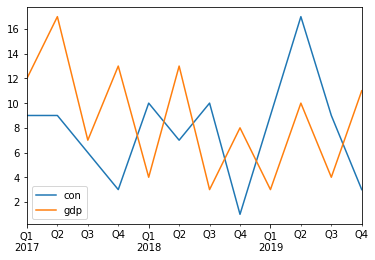

In [ ]:
df.plot()

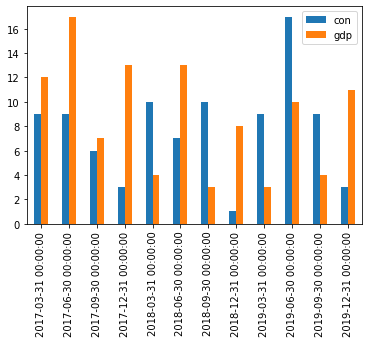

In [ ]:
df.plot.bar()

<Axes: >

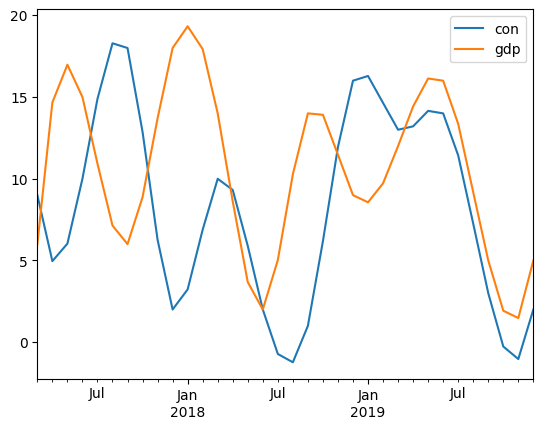

In [177]:
df.resample('M').interpolate(method='cubic').plot()
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

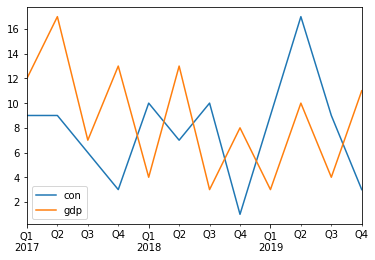

In [ ]:
df.plot()
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

In [ ]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})

In [ ]:
df

,value,date
0,2,20201201
1,4,2019-9-1
2,5,1 jul 2018
3,6,2017q1


In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [ ]:
df = df.set_index('date')

In [ ]:
df

,value
date,
2020-12-01,2
2019-09-01,4
2018-07-01,5
2017-01-01,6


- 전기 대비 증가율, 차분 등 함수를 원래 의도대로 적용하기 위해서는 데이터프레임의 데이트타임인덱스가 빠짐없이 순서대로 정렬되어야 함
- date_range()로 전체 샘플기간에 대한 데이터타임인덱스를 생성한 후 데이터프레임의 reindex(index)를 이용하여 적용

In [ ]:
df.pct_change()

,value
date,
2020-12-01,NaN
2019-09-01,1.00
2018-07-01,0.25
2017-01-01,0.20


## offsets

In [ ]:
from pandas.tseries.offsets import YearEnd, YearBegin, QuarterEnd, QuarterBegin

In [ ]:
df.index = df.index + YearEnd()
df

,value
date,
2020-12-31,2
2019-12-31,4
2018-12-31,5
2017-12-31,6


In [ ]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [ ]:
df.index = df.index + QuarterEnd()
df

,value
date,
2020-12-31,2
2019-09-30,4
2018-09-30,5
2017-03-31,6


데이트타임에서 연도, 분기, 월 추출

In [ ]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date)

In [ ]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [ ]:
df['month'] = df.date.dt.month

In [ ]:
df

,value,date,month
0,2,2020-12-01,12
1,4,2019-09-01,9
2,5,2018-07-01,7
3,6,2017-01-01,1


In [ ]:
df['day'] = df.date.dt.day

In [ ]:
df

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


# save/read

In [ ]:
pwd

'/content'

In [ ]:
import os
os.mkdir('pickles')

## to_pickle()

- python에서 매우 효율적임

In [ ]:
ls

pickles/  sample_data/


In [ ]:
df.to_pickle('pickles/df.pkl')

In [ ]:
ls pickles/

df.pkl


In [ ]:
df1 = pd.read_pickle('pickles/df.pkl')

In [ ]:
df1

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


## to_csv()

In [ ]:
df.to_csv('df.csv')
df_csv = pd.read_csv('df.csv', index_col=0)

## to_stata()

In [ ]:
df1.to_stata('df.dta')
df1_dta = pd.read_stata('df.dta')

## to_excel()

In [ ]:
writer = pd.ExcelWriter('dfs.xlsx')
df.to_excel(writer,'df')
df1.to_excel(writer,'df1')
df2.to_excel(writer,'df2')
writer.save()

## save multiple dataframes

In [ ]:
dfs = {'df': df, 'df1': df1, 'df2': df2}

In [ ]:
import pickle

In [ ]:
with open('dfs.pkl', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dfs.pkl', 'rb') as handle:
    dfs_pkl = pickle.load(handle)

# matplotlib

In [ ]:
%matplotlib inline

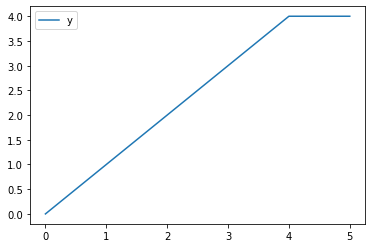

In [ ]:
df = pd.DataFrame([0, 1, 2, 3, 4, 4], columns = ['y'])
df.plot()

In [ ]:
# %matplotlib notebook

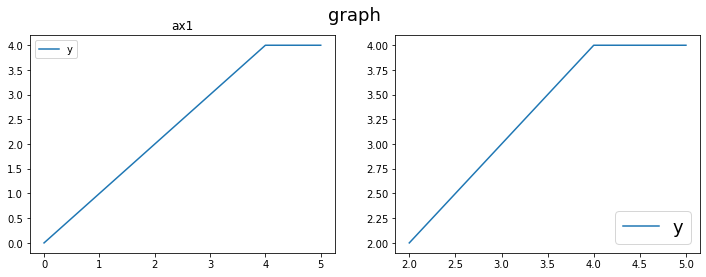

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

## x, y-axis

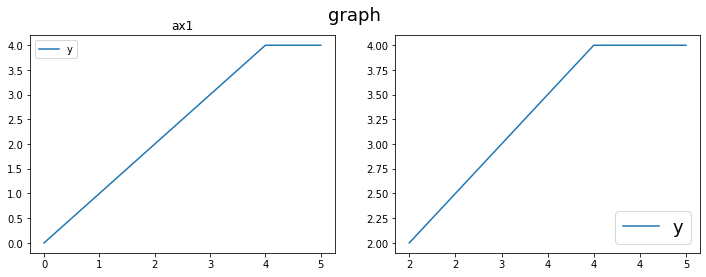

In [ ]:
from matplotlib.ticker import FuncFormatter as FF

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

dp2 = lambda x, p: '{:,.2f}'.format(x)
dp0 = lambda x, p: '{:,.0f}'.format(x)
ax[1].yaxis.set_major_formatter(FF(dp2))
ax[1].xaxis.set_major_formatter(FF(dp0))

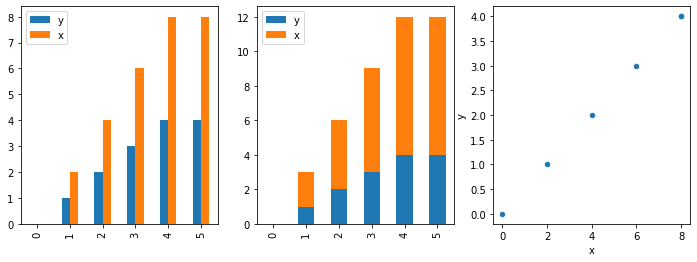

In [ ]:
df['x'] = df['y'] * 2

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

df.plot.bar(ax=ax[0])
df.plot.bar(stacked=True, ax=ax[1])
df.plot.scatter(x='x', y='y', ax=ax[2])

## bar chart

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'],
                  index = pd.date_range('2017-3-31', '2019-12-31', freq='Q'))

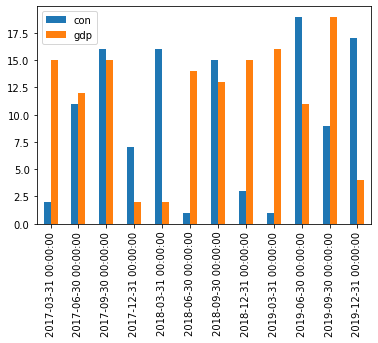

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

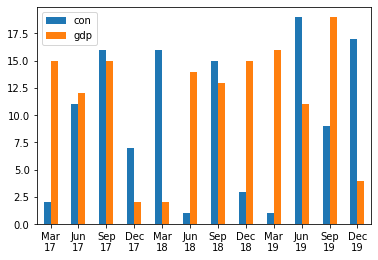

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

ticklabels = [pd.to_datetime(t.get_text()).strftime('%b\n%y') for t in ax.get_xticklabels()]
ax.set_xticklabels(ticklabels, rotation=0);

In [ ]:
def xaxis_date_format(ax, fmt = '%y'):
    '''fmt: '%b\n%y', '%y-%m-%d', etc '''
    ticklabels = [pd.to_datetime(t.get_text()).strftime(fmt) for t in ax.get_xticklabels()]
    ax.set_xticklabels(ticklabels, rotation=0)

## 한글

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


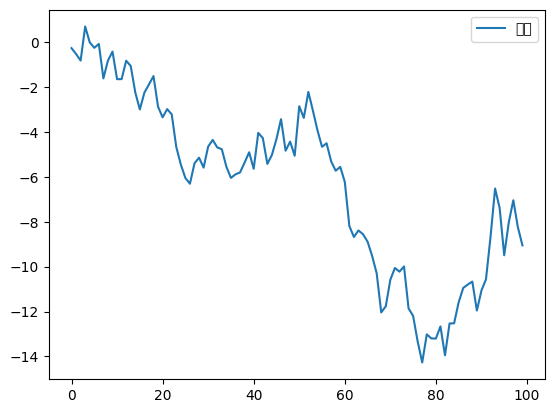

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()

현재 matplotlib가 사용할 수 있는 한글폰트 확인

In [3]:
import matplotlib.font_manager as fm
[f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

나눔글꼴 설치(리눅스)

In [8]:
!apt-get -y install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


matplotlib가 사용할 수 있는 폰트 리스트를 재구성하고, 코랩 재시작

In [4]:
import os

fm._rebuild()
os.kill(os.getpid(), 9)

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

현재 matplotlib가 사용할 수 있는 한글폰트 확인

In [5]:
import matplotlib.font_manager as fm
[f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

matplotlib에서 사용하려는 한글 폰트 지정하고, 그래프의 마이너스 라벨이 제대로 표시되도록 설정

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


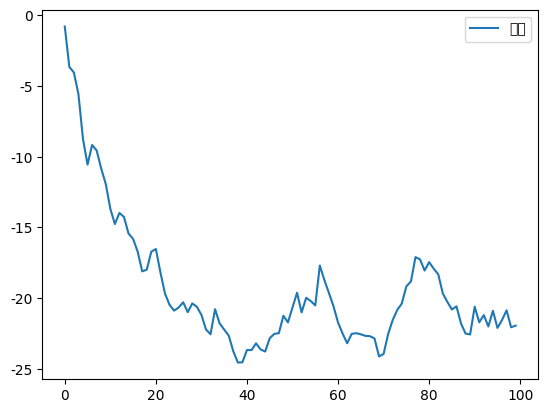

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()

# 연습문제

1. 성인 500명에 대한 키(cm)와 몸무게(kg) 데이터를 아래 관계에 따라 데이터프레임으로 생성하시오

$height \sim norm(170, 15)$

$weight = (height - 100)^{1.2} + u$, $u \sim norm(0, 5)$

2. 키와 몸무게 각각에 대한 히스토그램(5 kg/cm 구간)을 subplots을 이용하여 그리시오

3. 키 180cm 이상 및 이하로 그룹을 나누어 키와 몸무게의 산포도를 그리시오

In [108]:
!pip install countryinfo

In [111]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.4 MB/s eta 0:00:00


In [9]:
import pycountry
from countryinfo import CountryInfo

In [10]:
country_names = [country.name for country in pycountry.countries]

[i for i in country_names if 'Korea' in i]

['Korea, Republic of', "Korea, Democratic People's Republic of"]

In [11]:
country_dict = {}

for country in pycountry.countries:
  try:
    if country.name == 'Korea, Republic of':
      country.name = 'South Korea'
    elif country.name == "Korea, Democratic People's Republic of":
      country.name = 'North Korea'

    country_info = CountryInfo(country.name)
    info = {
        'name': country.name,
        'continent': country_info.region(),
        'capital': country_info.capital(),
        'currency': country_info.currencies(),
        'language': country_info.languages(),
        'borders': country_info.borders()
    }
    country_dict[country.alpha_3] = info

  except KeyError:
    print('country name error: ', country.name)
    continue


country name error:  Åland Islands
country name error:  Andorra
country name error:  Antarctica
country name error:  French Southern Territories
country name error:  Bonaire, Sint Eustatius and Saba
country name error:  Bahamas
country name error:  Saint Barthélemy
country name error:  Bolivia, Plurinational State of
country name error:  Brunei Darussalam
country name error:  Bouvet Island
country name error:  Côte d'Ivoire
country name error:  Congo, The Democratic Republic of the
country name error:  Congo
country name error:  Cabo Verde
country name error:  Curaçao
country name error:  Czechia
country name error:  Falkland Islands (Malvinas)
country name error:  Micronesia, Federated States of
country name error:  Gambia
country name error:  Iran, Islamic Republic of
country name error:  Macao
country name error:  Saint Martin (French part)
country name error:  Moldova, Republic of
country name error:  North Macedonia
country name error:  Myanmar
country name error:  Montenegro
coun

In [12]:
print(country_dict['KOR'])
print(country_dict['PRK'])

{'name': 'South Korea', 'continent': 'Asia', 'capital': 'Seoul', 'currency': ['KRW'], 'language': ['ko'], 'borders': ['PRK']}
{'name': 'North Korea', 'continent': 'Asia', 'capital': 'Pyongyang', 'currency': ['KPW'], 'language': ['ko'], 'borders': ['CHN', 'KOR', 'RUS']}


In [14]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

In [17]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [18]:
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


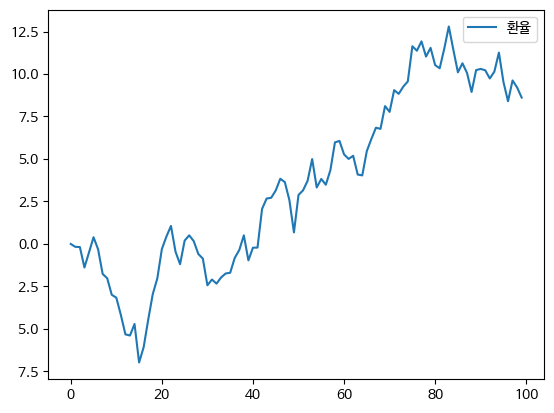

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()